In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customer = pd.read_csv("K:\DATA SCIENCE\DataSets\Churn_Modelling.csv")

In [3]:
customer.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
customer.duplicated().sum()

0

In [6]:
customer['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
customer['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
customer['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
customer.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace = True)

In [10]:
customer.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [12]:
label = LabelEncoder()

In [13]:
customer['Geography']= label.fit_transform(customer['Geography'])
customer['Gender']= label.fit_transform(customer['Gender'])


In [14]:
customer.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
X = customer.drop('Exited',axis=1)
y = customer['Exited']

In [16]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state = 2)

In [20]:
X.shape
X_train.shape

(8000, 10)

In [21]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
X_train

array([[ 1.27754581, -0.90446787, -1.0862028 , ...,  0.64920267,
         0.96510833, -0.62027126],
       [-0.49959477,  0.30694063, -1.0862028 , ...,  0.64920267,
         0.96510833,  0.54659799],
       [ 0.67827747, -0.90446787, -1.0862028 , ...,  0.64920267,
         0.96510833, -0.01320771],
       ...,
       [ 2.06279398, -0.90446787,  0.9206384 , ...,  0.64920267,
        -1.03615311,  1.64356719],
       [-1.02653762,  0.30694063,  0.9206384 , ...,  0.64920267,
        -1.03615311,  1.32474442],
       [ 0.03768029, -0.90446787, -1.0862028 , ...,  0.64920267,
        -1.03615311,  0.88413017]])

In [40]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [42]:
model = Sequential()

model.add(Dense(15,activation = 'relu',input_dim = 10))
model.add(Dropout(0.1))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))


In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                165       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop',metrics = ['accuracy'])

In [45]:
history= model.fit(X_train,y_train, epochs = 100, validation_split= 0.2)

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.5112 - accuracy: 0.7894 - val_loss: 0.4476 - val_accuracy: 0.8062
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4536 - accuracy: 0.7900 - val_loss: 0.4217 - val_accuracy: 0.8062
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4365 - accuracy: 0.7900 - val_loss: 0.4107 - val_accuracy: 0.8062
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4309 - accuracy: 0.7927 - val_loss: 0.4057 - val_accuracy: 0.8269
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4243 - accuracy: 0.8133 - val_loss: 0.4004 - val_accuracy: 0.8344
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4197 - accuracy: 0.8191 - val_loss: 0.3973 - val_accuracy: 0.8356
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8255 - val_loss: 0.3925 - val_accuracy: 0.8394

In [47]:
y_log = model.predict(X_test) # As we have used sigmoid as activation function it will give values between 0 to 1. 

In [51]:
y_pred = np.where(y_log>0.5,1,0) # We need to decide a threashould for classification, here for example values above 0.5 will be 1(Yes) and below will be 0 (No)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, y_pred)

0.8565

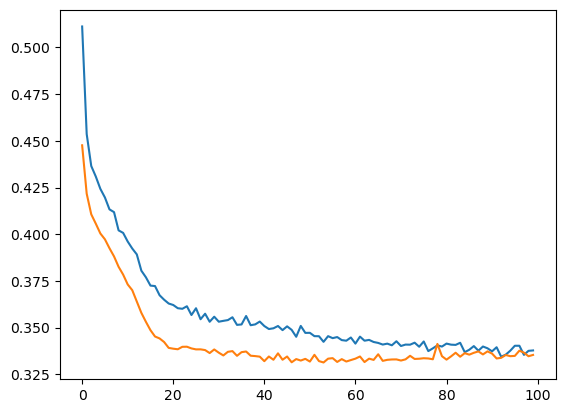

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

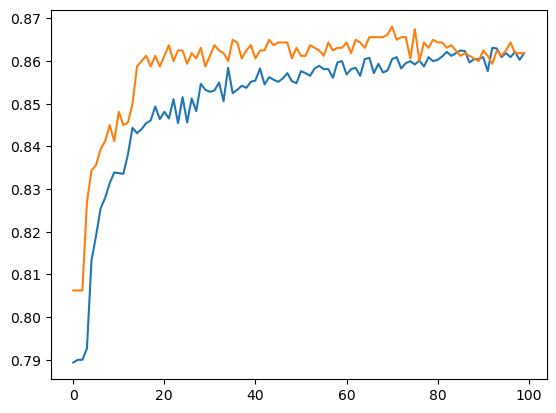

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])